## Final Project 

## Basic Principles to respect 

Tufte's basics:

- P.76: Comparisons must be enforced within the scope of the eyespan, a fundamental point occasionally forgotten in practice

- P.80: Use color in information design to label (color as a noun), to measure (color as a quantity), to represent or imitate reality (color as representation), and to enliven or decorate (color as beauty)

- P.67: Small multiples reveal, all at once, a scope of alternatives, a range of options. 

- P.66: Small multiple designs, multivariate and data bountiful, answer directly by visually enforcing comparisons of changes, of the differences among objects, of the scope of alternatives. 

- P.57: Layer by prioritizing high information value versus low information value, separate layers of information by means of distinctions in shape, value, size, and color. 

- P.49: Micro/Macro designs enforce both local and global comparisons, and at the same time, avoid the disruption of context switching. 

- P.48 All micro/macro designs portray large quantities of data as high densities


In [3]:
# Uploading all files 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mplt
import plotly as plt
from plotnine import *
from plotnine.data import economics

from bokeh.layouts import column, gridplot
from bokeh.models import ColorBar, ColumnDataSource, LinearColorMapper, LogColorMapper
from bokeh.plotting import figure, show
from bokeh.transform import transform



df_t1= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/Table1.plk")
df_t4= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/Table4.plk")
df_t5= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/Table5.plk")
df_t6= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/Table6.plk")
df_t7= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/Table7.plk")

df_s= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/summary.plk")
df_s4= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/summary4.plk")
df_s5= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/summary5.plk")
df_s6= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/summary6.plk")
df_s7= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Pickle Files/summary7.plk")

## Rename columns for easier manipulation in the visuals.

In [4]:
df_s.rename(columns = {
"Name": "country",
"Notes" : "notes", 
"Country Code": "countrycode",
"# of Migrants": "migrants",
"Population(in thousands)" : "population",
"# of Migrants as Pourcentage of Population" : "percentage", 
     }, inplace=True)



In [5]:
df_t1.rename(columns = {
"Name": "country",
"Notes" : "notes", 
"Country Code": "countrycode",
"# of Migrants": "migrants",
"Population(in thousands)" : "population",
"# of Migrants as Pourcentage of Population" : "percentage", 
     }, inplace=True)

In [6]:
df_t4.rename(columns = {
"Name": "country",
"Notes" : "notes", 
"Country Code": "countrycode",
"Female Migrants Percentage of Migrant Stock": "femalemigrantsperc",
     }, inplace=True)

In [7]:
df_t5.rename(columns = {
"Name": "country",
"Notes" : "notes", 
"Country Code": "countrycode",
"Annual rate of change of the migrant stock": "annratechange",
     }, inplace=True)

In [8]:
df_t6.rename(columns = {
"Name": "country",
"Year": "year",
"Refugee Stock Both Sexes": "refugees",
"Percentage of Refugee Stock Within Migrant Stock":"percwithinmigrant"
     }, inplace=True)

In [9]:
df_t7.rename(columns = {
"Name": "country",
"annual rate change of refugee stock" : "ratechangerefugees"
     }, inplace=True)

## Replace replace leftover empty values with a zero, which should have been done in the tidy data phase
## Assessment => Numbers in cells are not numbers, but strings.  Convert the strings into usable numbers. 

In [10]:
df_s['migrants']=(df_s['migrants'].replace(to_replace =[".."],value =["0"]))
df_s['population']=(df_s['population'].replace(to_replace =[".."],value =["0"]))
df_s['percentage']=(df_s['percentage'].replace(to_replace =[".."],value =["0"]))
df_s['migrants']=df_s['migrants'].astype(float)
df_s['population']=df_s['migrants'].astype(float)
df_s['percentage']=df_s['percentage'].astype(float)
df_s['years']=df_s['years'].astype(float)

In [11]:
df_t1['migrants']=(df_t1['migrants'].replace(to_replace =[".."],value =["0"]))
df_t1['population']=(df_t1['population'].replace(to_replace =[".."],value =["0"]))
df_t1['percentage']=(df_t1['percentage'].replace(to_replace =[".."],value =["0"]))
df_t1['migrants']=df_t1['migrants'].astype(float)
df_t1['population']=df_t1['migrants'].astype(float)
df_t1['percentage']=df_t1['percentage'].astype(float)
df_t1['years']=df_t1['years'].astype(float)
df_t1['refugeeincluded']=(df_t1['refugeeincluded'].replace(to_replace =["FALSE", "TRUE"],value =[0,1]))

In [12]:
df_t4['femalemigrantsperc']=(df_t4['femalemigrantsperc'].replace(to_replace =[".."],value =["0"]))
df_t4['femalemigrantsperc']=df_t4['femalemigrantsperc'].astype(float)
df_t4['years']=df_t4['years'].astype(float)

In [13]:
df_t5['annratechange']=(df_t5['annratechange'].replace(to_replace =[".."],value =["0"]))
df_t5['annratechange']=df_t5['annratechange'].astype(float)

In [14]:
df_t6['refugees']=(df_t6['refugees'].replace(to_replace =[".."],value =["0"]))
df_t6['percwithinmigrant']=(df_t6['percwithinmigrant'].replace(to_replace =[".."],value =["0"]))
df_t6['refugees']=df_t6['refugees'].astype(float)
df_t6['year']=df_t6['year'].astype(float)
df_t6['percwithinmigrant']=df_t6['percwithinmigrant'].astype(float)

In [15]:

df_t7['ratechangerefugees']=(df_t7['ratechangerefugees'].replace(to_replace =[".."],value =["0"]))
df_t7['ratechangerefugees']=df_t7['ratechangerefugees'].astype(float)


## Visualization Exploration Smaller Sample Set
- Began with a smaller sample set "Summary" table
- Boxplots, Violinplots

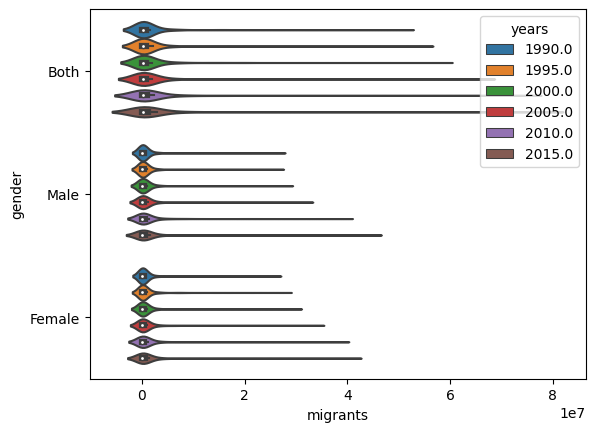

In [16]:
# Is there a gender disparity in the number of migrants?
sns_plot = sns.violinplot(x='migrants', y='gender', hue="years", data=df_t1)



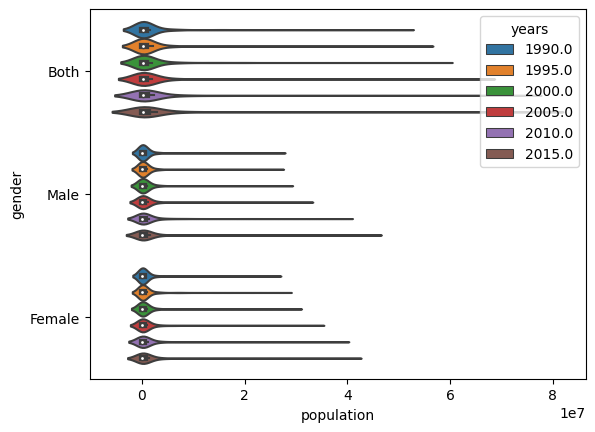

In [17]:
# Is there a gender disparity in the population of countries?
sns_plot = sns.violinplot(x='population', y='gender', hue="years", data=df_t1)

Text(0.5, 1.0, 'Boxplot of Migrants in Each Country Category/Region')

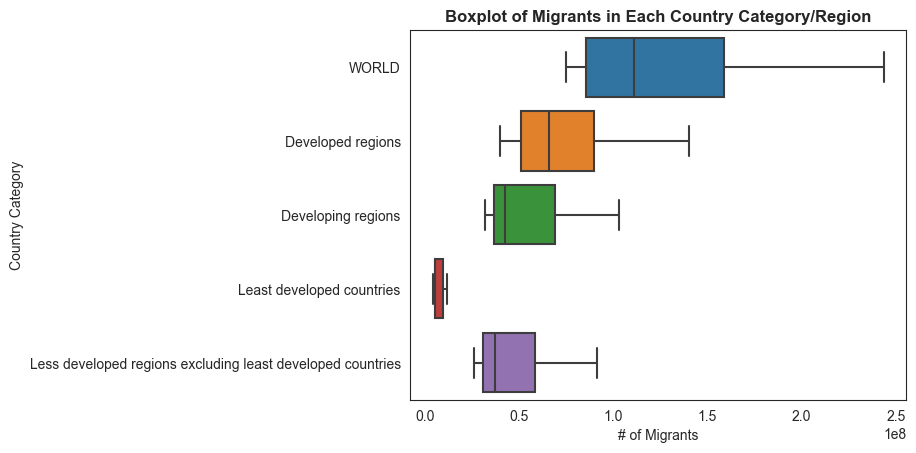

In [38]:
# Between developed and less developed, is there a difference in the # of migrants? 
sns_plot = sns.boxplot(x='migrants', y='country', data=df_s)
plt.xlabel('# of Migrants')
plt.ylabel('Country Category')
plt.title('Boxplot of Migrants in Each Country Category/Region',fontweight="bold")

<AxesSubplot: xlabel='percentage', ylabel='country'>

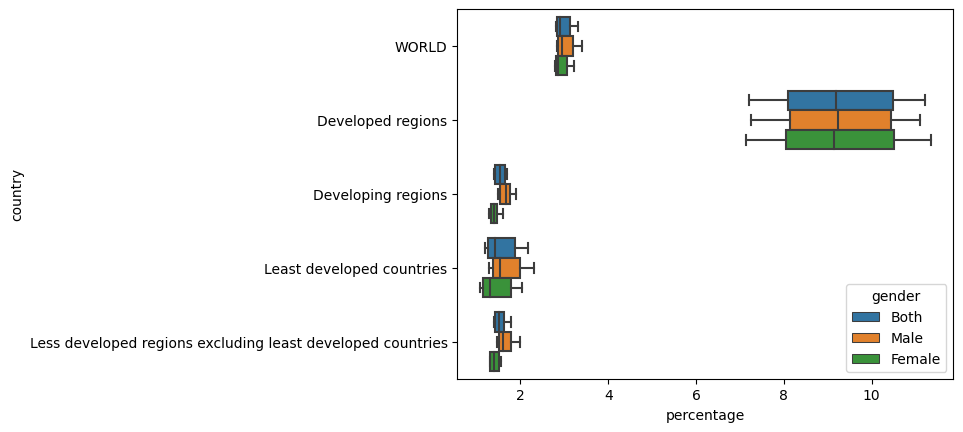

In [19]:
sns.boxplot(data=df_s, x="percentage", y="country", hue="gender")

<AxesSubplot: xlabel='years', ylabel='migrants'>

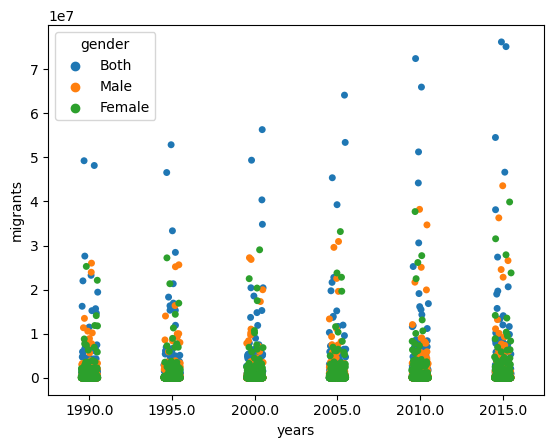

In [20]:
sns.stripplot(data=df_t1, x="years", y="migrants", hue="gender")

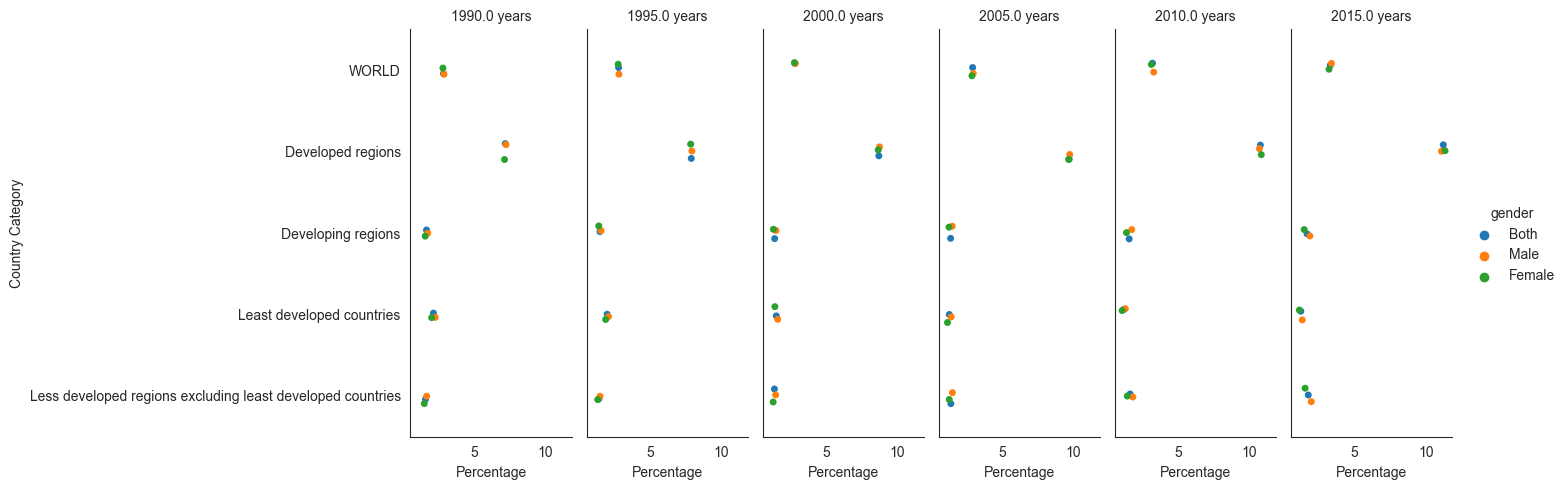

In [54]:
g = sns.catplot(data=df_s, x="percentage", y="country", hue="gender", col="years", aspect=.5)
g.set_axis_labels("Percentage", "Country Category")
g.set_titles("{col_name} {col_var}")

In [22]:

group = df_t1.groupby('country')

In [23]:
group.size()

country
Afghanistan       18
Africa            18
Albania           18
Algeria           18
American Samoa    18
                  ..
Western Europe    18
Western Sahara    18
Yemen             18
Zambia            18
Zimbabwe          18
Length: 260, dtype: int64

In [24]:
group['migrants'].agg(['max', 'min', 'mean'])

max        min          mean
country                                            
Afghanistan       382365.0    25128.0  8.633733e+04
Africa          20649557.0  6943948.0  1.105827e+07
Albania            76695.0    25883.0  4.324456e+04
Algeria           273954.0   109461.0  1.689987e+05
American Samoa     24912.0    10108.0  1.558856e+04
...                    ...        ...           ...
Western Europe  27382470.0  7731651.0  1.448726e+07
Western Sahara      5179.0     1223.0  2.503222e+03
Yemen             344131.0    51853.0  1.333238e+05
Zambia            321167.0    63403.0  1.527594e+05
Zimbabwe          626821.0   168723.0  2.952820e+05

[260 rows x 3 columns]

In [25]:
meant1 = df_t1.groupby('country')['migrants'].agg(['mean'])

In [26]:
df_t1.groupby(by=['country', 'gender']).size()
     


country      gender
Afghanistan  Both      6
             Female    6
             Male      6
Africa       Both      6
             Female    6
                      ..
Zambia       Female    6
             Male      6
Zimbabwe     Both      6
             Female    6
             Male      6
Length: 780, dtype: int64

## Exploring visualization using a bigger sample set

Text(0, 0.5, 'Percentage of Female Migrants')

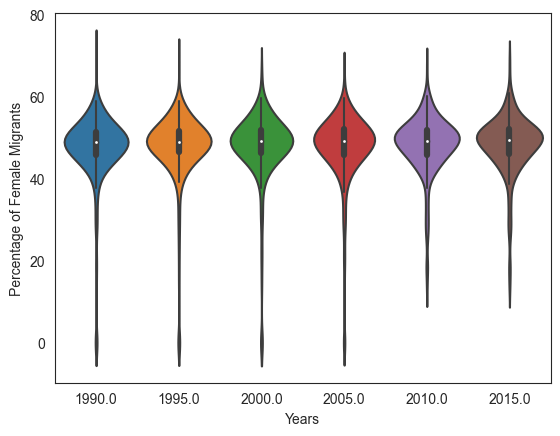

In [27]:

import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("white")
sns.violinplot(data=df_t4, x="years", y="femalemigrantsperc")
plt.xlabel('Years')
# Set y-axis label
plt.ylabel('Percentage of Female Migrants')
# we used this to get rid of the computer generate graph title

/var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/ipykernel_88663/3511202163.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/ipykernel_88663/3511202163.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/ipykernel_88663/3511202163.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



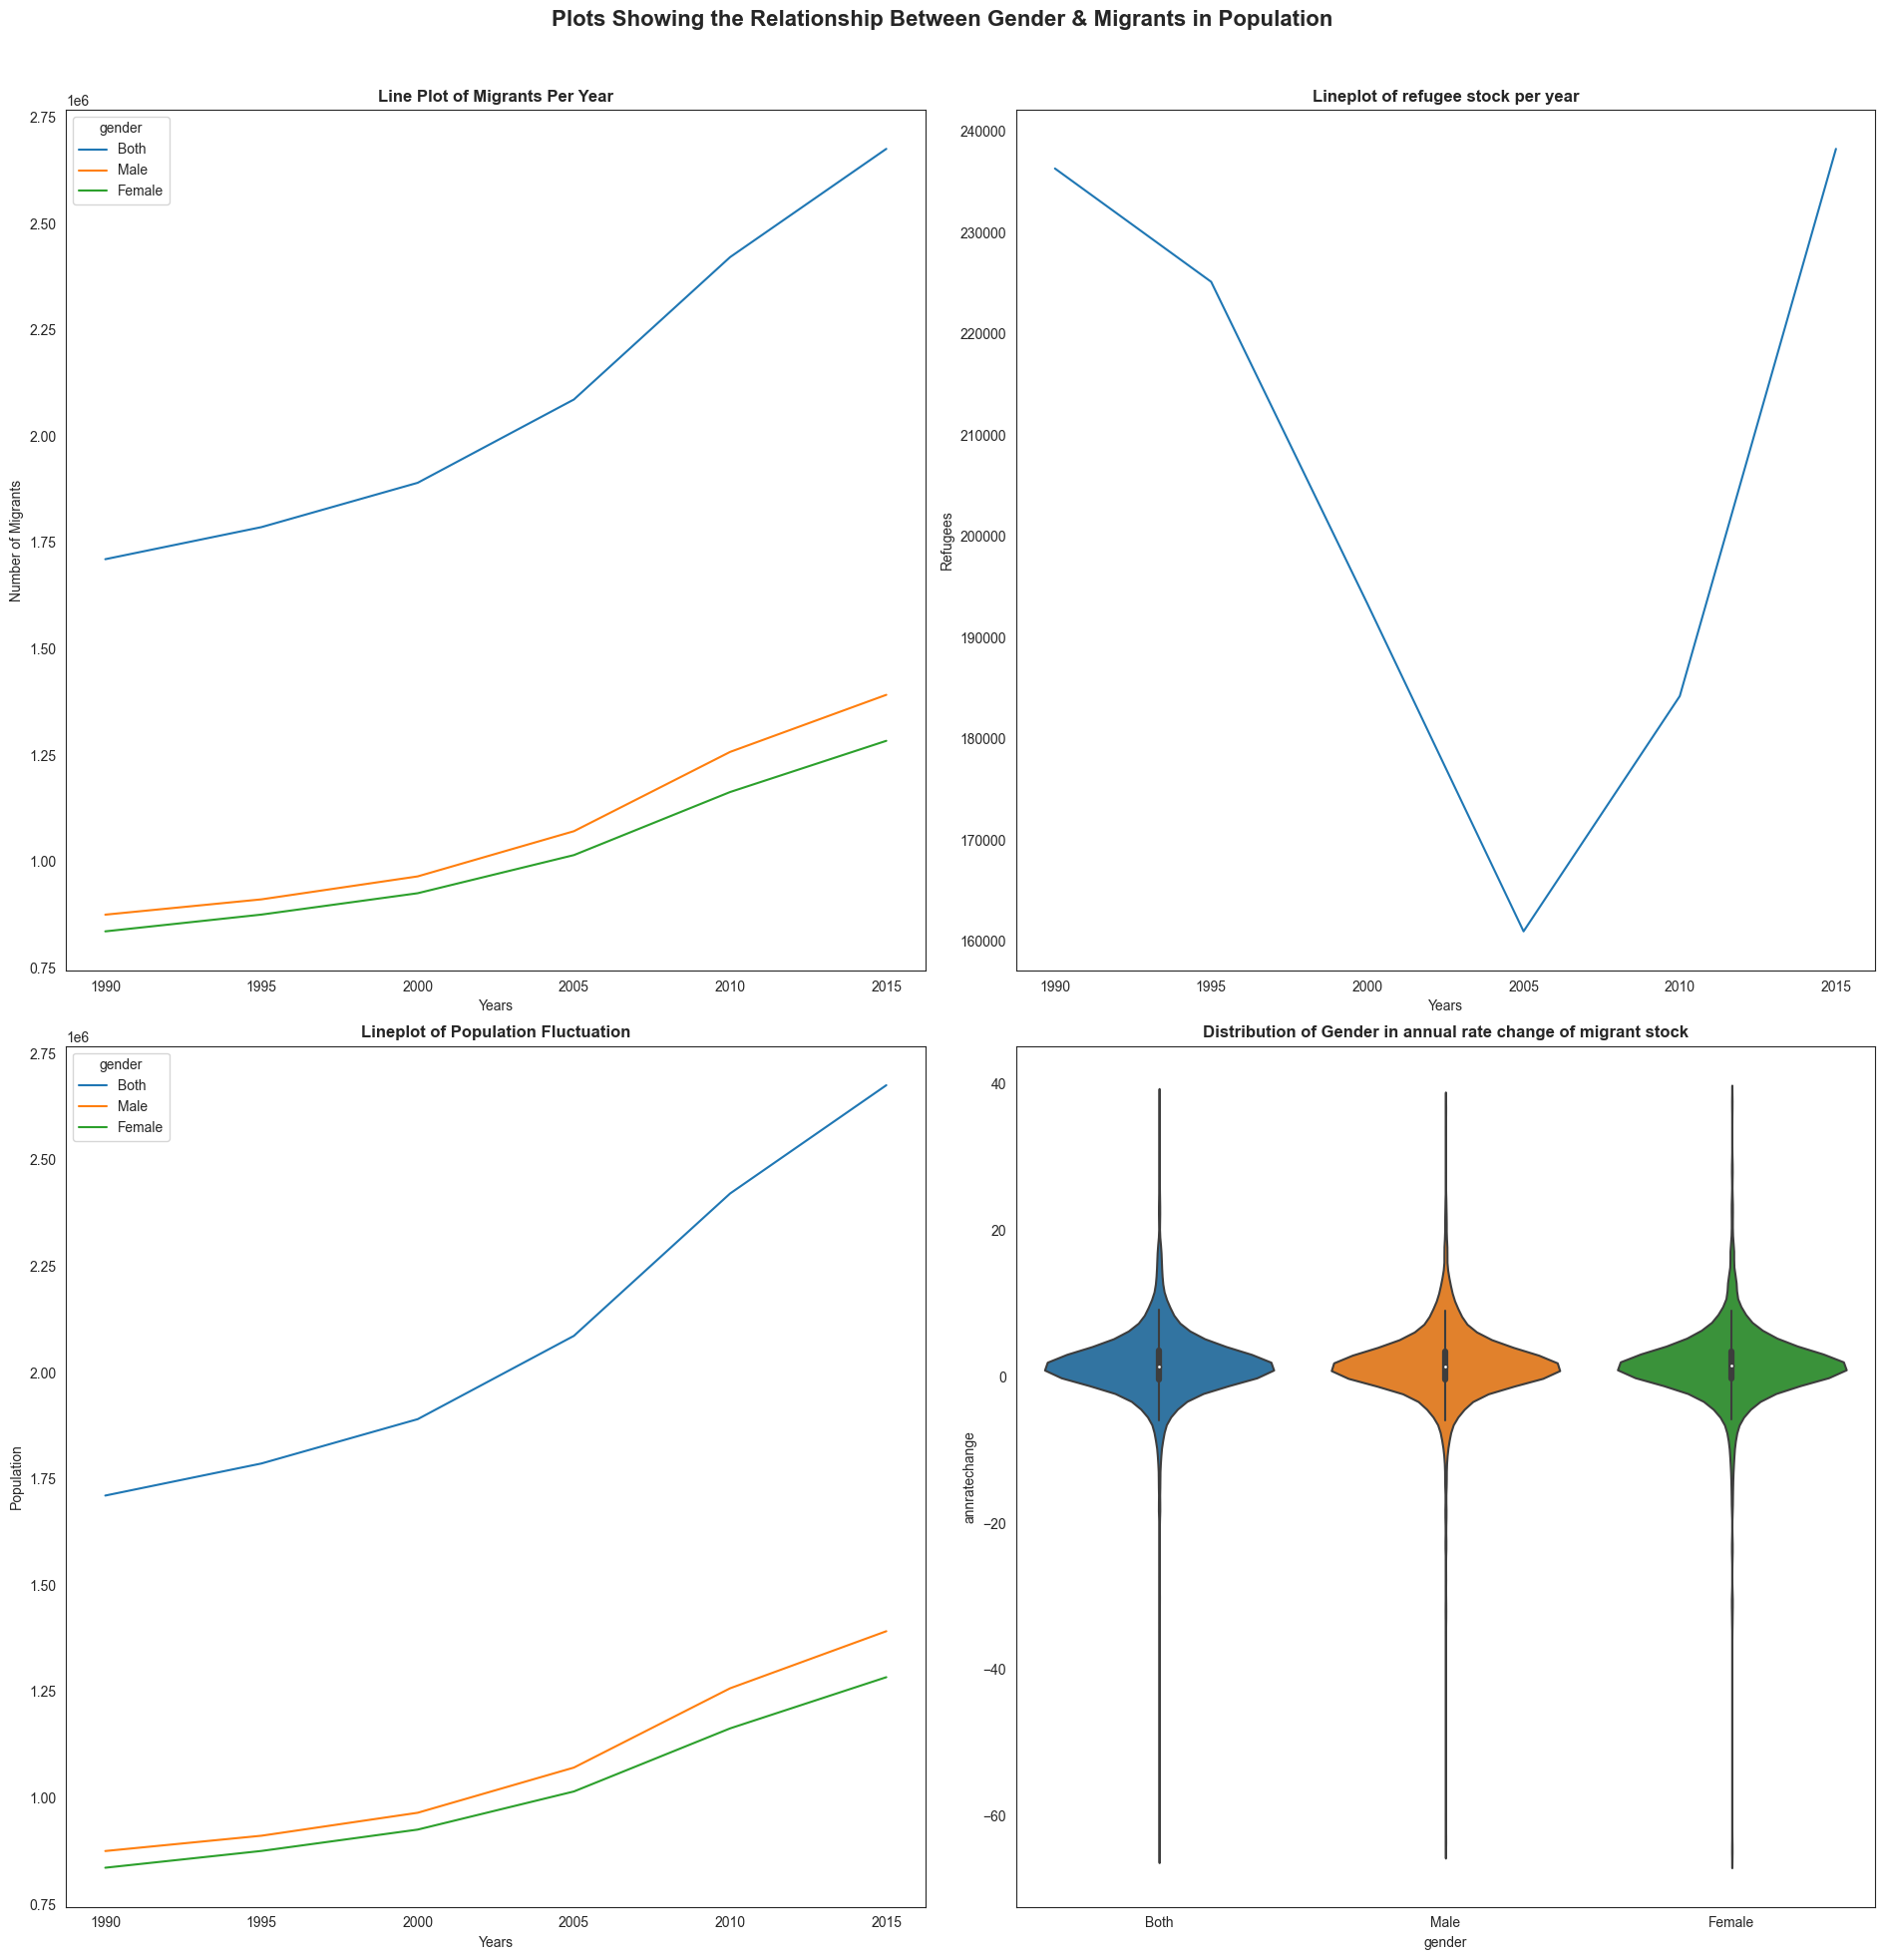

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import pandas as pd
import plotly.express as px

sns.set_style('white')

#we will be showing 
f, ax = plt.subplots(2, 2, figsize=(19,20))
f.suptitle('Plots Showing the Relationship Between Gender & Migrants in Population',fontweight='bold',fontsize=16)


ax[0,0].set_title('Line Plot of Migrants Per Year',fontweight="bold")
ax[0,0].set_ylabel('Number of Migrants')
ax[0,0].set_xlabel('Years')
sns.lineplot(y="migrants", x="years", hue = "gender", estimator = "mean", ci=None, data=df_t1, ax=ax[0,0])

ax[0,1].set_title('Lineplot of refugee stock per year',fontweight="bold")
ax[0,1].set_ylabel('Refugees')
ax[0,1].set_xlabel('Years')
sns.lineplot(y="refugees", x="year", estimator = "mean", ci=None, data=df_t6, ax=ax[0,1])

ax[1,0].set_title('Lineplot of Population Fluctuation',fontweight="bold")
ax[1,0].set_ylabel('Population')
ax[1,0].set_xlabel('Years')
sns.lineplot(y="population", x="years", hue="gender", data=df_t1, estimator = "mean", ci=None, ax=ax[1,0])

ax[1,1].set_title('Distribution of Gender in annual rate change of migrant stock',fontweight="bold")
ax[1,1].set_ylabel('Annual Rate Change')
ax[1,1].set_xlabel('Gender')

sns.violinplot(y="annratechange", x="gender", data=df_t5, ax=ax[1,1])
f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()

## More complex visualizations

## Relationship between population and migrants per country

In [29]:
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

[d3blocks] >INFO> Cleaning edge_properties and config parameters..


In [30]:
# Set random sizes, and opacity
size=np.random.randint(0, 8, df_t1.shape[0])
opacity=np.random.randint(0, 8, df_t1.shape[0])/10
# Tooltip are the digit labels
tooltip = df_t1['country'].values.astype(str)

# Set all propreties
d3.scatter(df_t1['population'].values,                   # PC1 x-coordinates
           df_t1['migrants'].values,                   # PC2 y-coordinates
           x1=df_t1['migrants'].values,             # tSNE x-coordinates
           y1=df_t1['percentage'].values,             # tSNE y-coordinates
           color=df_t1['country'].values.astype(str),   # Hex-colors or classlabels
           tooltip=tooltip,                    # Tooltip
           size=size,                          # Node size
           opacity=opacity,                    # Opacity
           stroke='#000000',                   # Edge color
           cmap='tab20',                       # Colormap
           scale=True,                         # Scale the datapoints
           label_radio=['migrants', 'population'],
           figsize=[1024, 768], 
           filepath='scatter_demo.html',
           )

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Scatter]
[d3blocks] >INFO> Scaling xy-coordinates.
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/d3blocks/scatter_demo.html]
[d3blocks] >INFO> File not found: [file:////var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/d3blocks/scatter_demo.html]


## Boxplots with quantile range

In [65]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2 as df
from bokeh.transform import factor_cmap, jitter

classes = list(sorted(df_s.country.unique()))

p = figure(height=400, x_range=classes, background_fill_color="#efefef",
           title="Migrants Per Region quantile range")
p.xgrid.grid_line_color = None

g = df_s.groupby("country")
upper = g.migrants.quantile(0.80)
lower = g.migrants.quantile(0.20)
source = ColumnDataSource(data=dict(base=classes, upper=upper, lower=lower))

error = Whisker(base="base", upper="upper", lower="lower", source=source,
                level="annotation", line_width=2)
error.upper_head.size=20
error.lower_head.size=20
p.add_layout(error)

p.circle(jitter("country", 0.3, range=p.x_range), "migrants", source=df_s,
         alpha=0.5, size=13, line_color="white",
         color=factor_cmap("country", "Light6", classes))

show(p)

ValueError: failed to validate CategoricalColorMapper(id='1079', ...).palette: expected an element of Seq(Color), got 'Light6'

In [ ]:

classes = list(sorted(df_t1.country.tail(7).unique()))

p = figure(height=400, x_range=classes, background_fill_color="#efefef",
           title="Comparative of Migrants per 6 countries  quantile range")
p.xgrid.grid_line_color = None

g = df_t1.groupby("country")
upper = g.migrants.quantile(0.80)
lower = g.migrants.quantile(0.20)
source = ColumnDataSource(data=dict(base=classes, upper=upper, lower=lower))

error = Whisker(base="base", upper="upper", lower="lower", source=source,
                level="annotation", line_width=2)
error.upper_head.size=20
error.lower_head.size=20
p.add_layout(error)

p.circle(jitter("country", 0.3, range=p.x_range), "migrants", source=df_t1,
         alpha=0.5, size=13, line_color="white",
         color=factor_cmap("country", "Light6", classes))

show(p)

/var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/ipykernel_82634/312557187.py:10: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('base', 7), ('lower', 260), ('upper', 260)



## Pairplot demonstrating various statistics

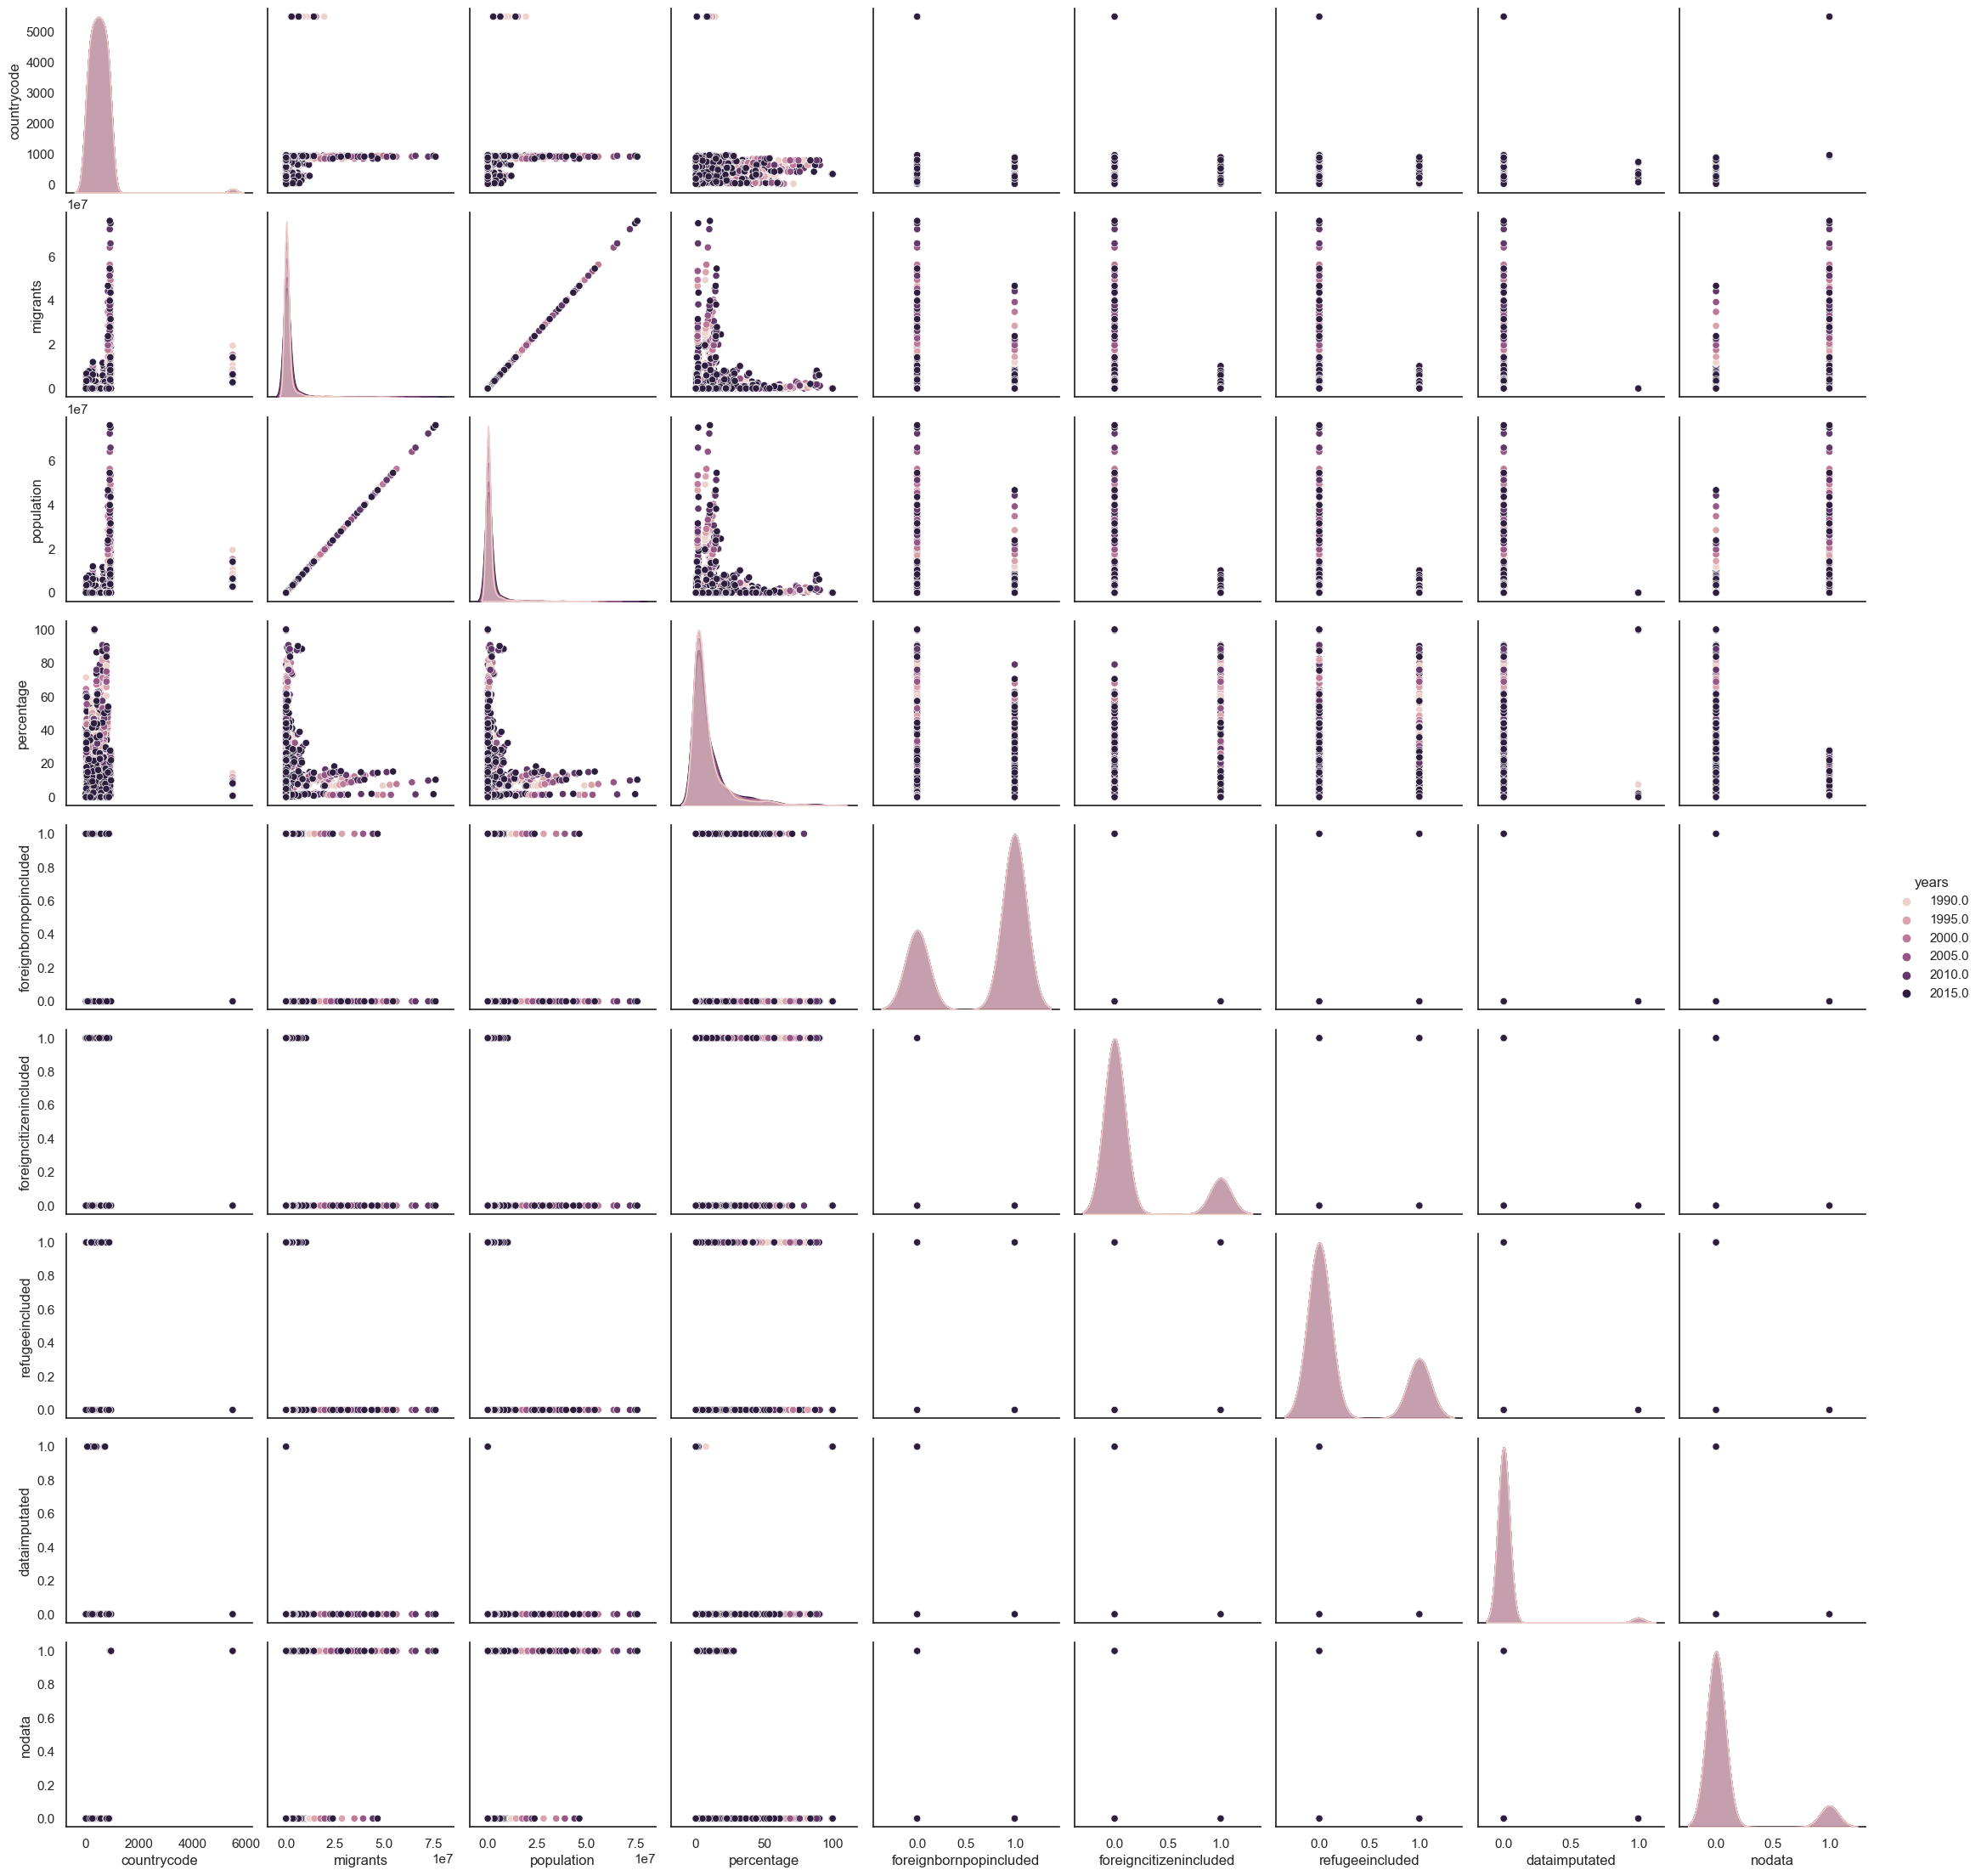

In [ ]:
sns.pairplot(data=df_t1, hue="years")

## Reassessing how to better visualize large numbers
I realized that large numbers are really hard to place when there are such huge differences from country to country. The best option was to find a way to standardize large numbers to see the ratio rather than to see the actual quantities that are much too large to visualize

In [ ]:
# Binning of the data based on a condition
df_t1.loc[df_t1.migrants < 10000, 'migrants'] = 0
df_t1.loc[(df_t1.migrants > 10000) & (df_t1.migrants < 100000), 'migrants'] = 1
df_t1.loc[(df_t1.migrants > 100000) & (df_t1.migrants < 200000), 'migrants'] = 2
df_t1.loc[(df_t1.migrants > 200000) & (df_t1.migrants < 300000), 'migrants'] = 3
df_t1.loc[(df_t1.migrants > 300000) & (df_t1.migrants < 400000), 'migrants'] = 4
df_t1.loc[(df_t1.migrants > 400000) & (df_t1.migrants < 500000), 'migrants'] = 5
df_t1.loc[df_t1.migrants > 500000, 'migrants'] = 6

In [ ]:
# Binning of the data based on a condition
df_t1.loc[df_t1.population < 10000, 'migrants'] = 0
df_t1.loc[(df_t1.population > 10000) & (df_t1.population < 500000), 'population'] = 1
df_t1.loc[(df_t1.population > 500000) & (df_t1.population < 1000000), 'population'] = 2
df_t1.loc[(df_t1.population > 1000000) & (df_t1.population < 5000000), 'population'] = 3
df_t1.loc[(df_t1.population > 5000000) & (df_t1.population < 10000000), 'population'] = 4
df_t1.loc[(df_t1.population > 10000000) & (df_t1.population < 20000000), 'population'] = 5
df_t1.loc[df_t1.population > 20000000, 'population'] = 6

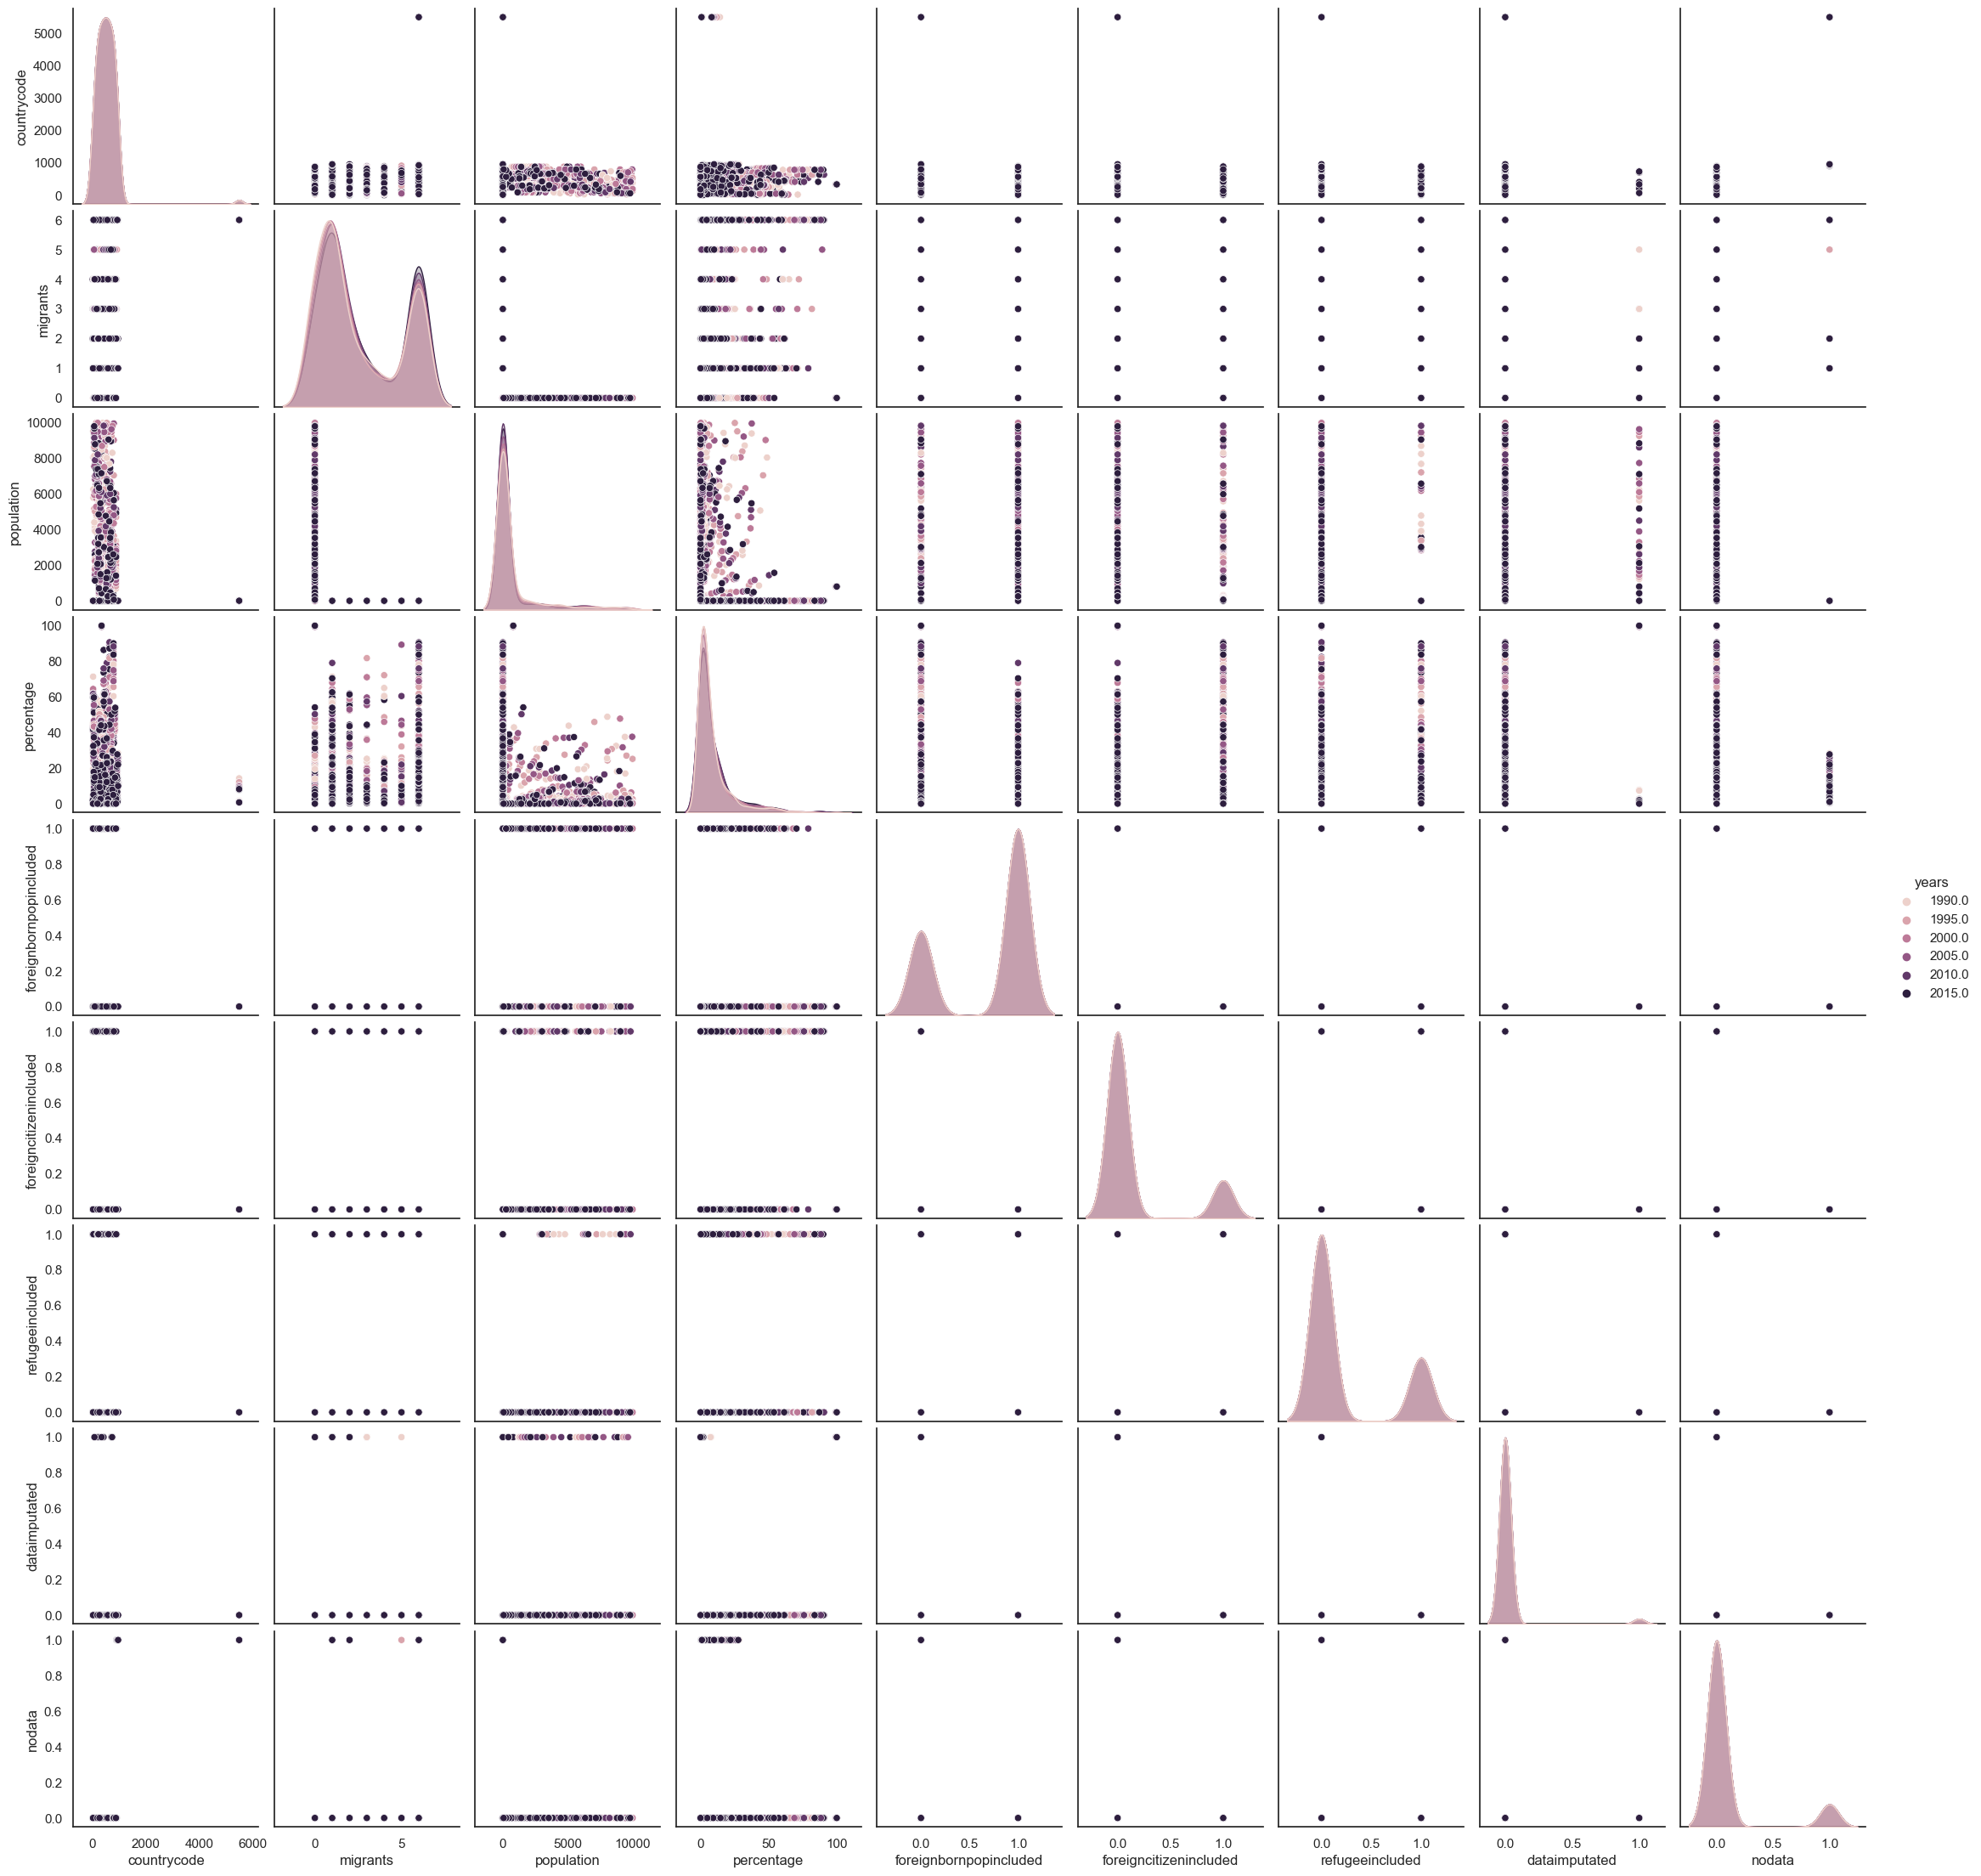

In [ ]:
sns.pairplot(data=df_t1, hue="years")

## Eastern Africa

In [62]:

easternafrica = [ "Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "Kenya", "Madagascar", "Malawi", "Mauritius", "Mayotte", "Mozambique","Réunion","Rwanda", "Seychelles","Somalia", "South Sudan","Uganda","United Republic of Tanzania","Zambia", "Zimbabwe"]
df_filtered = df_t1[df_t1['country'].isin(easternafrica)]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future vers

Text(0.5, 0.98, 'Migrant Density in Eastern Africa')

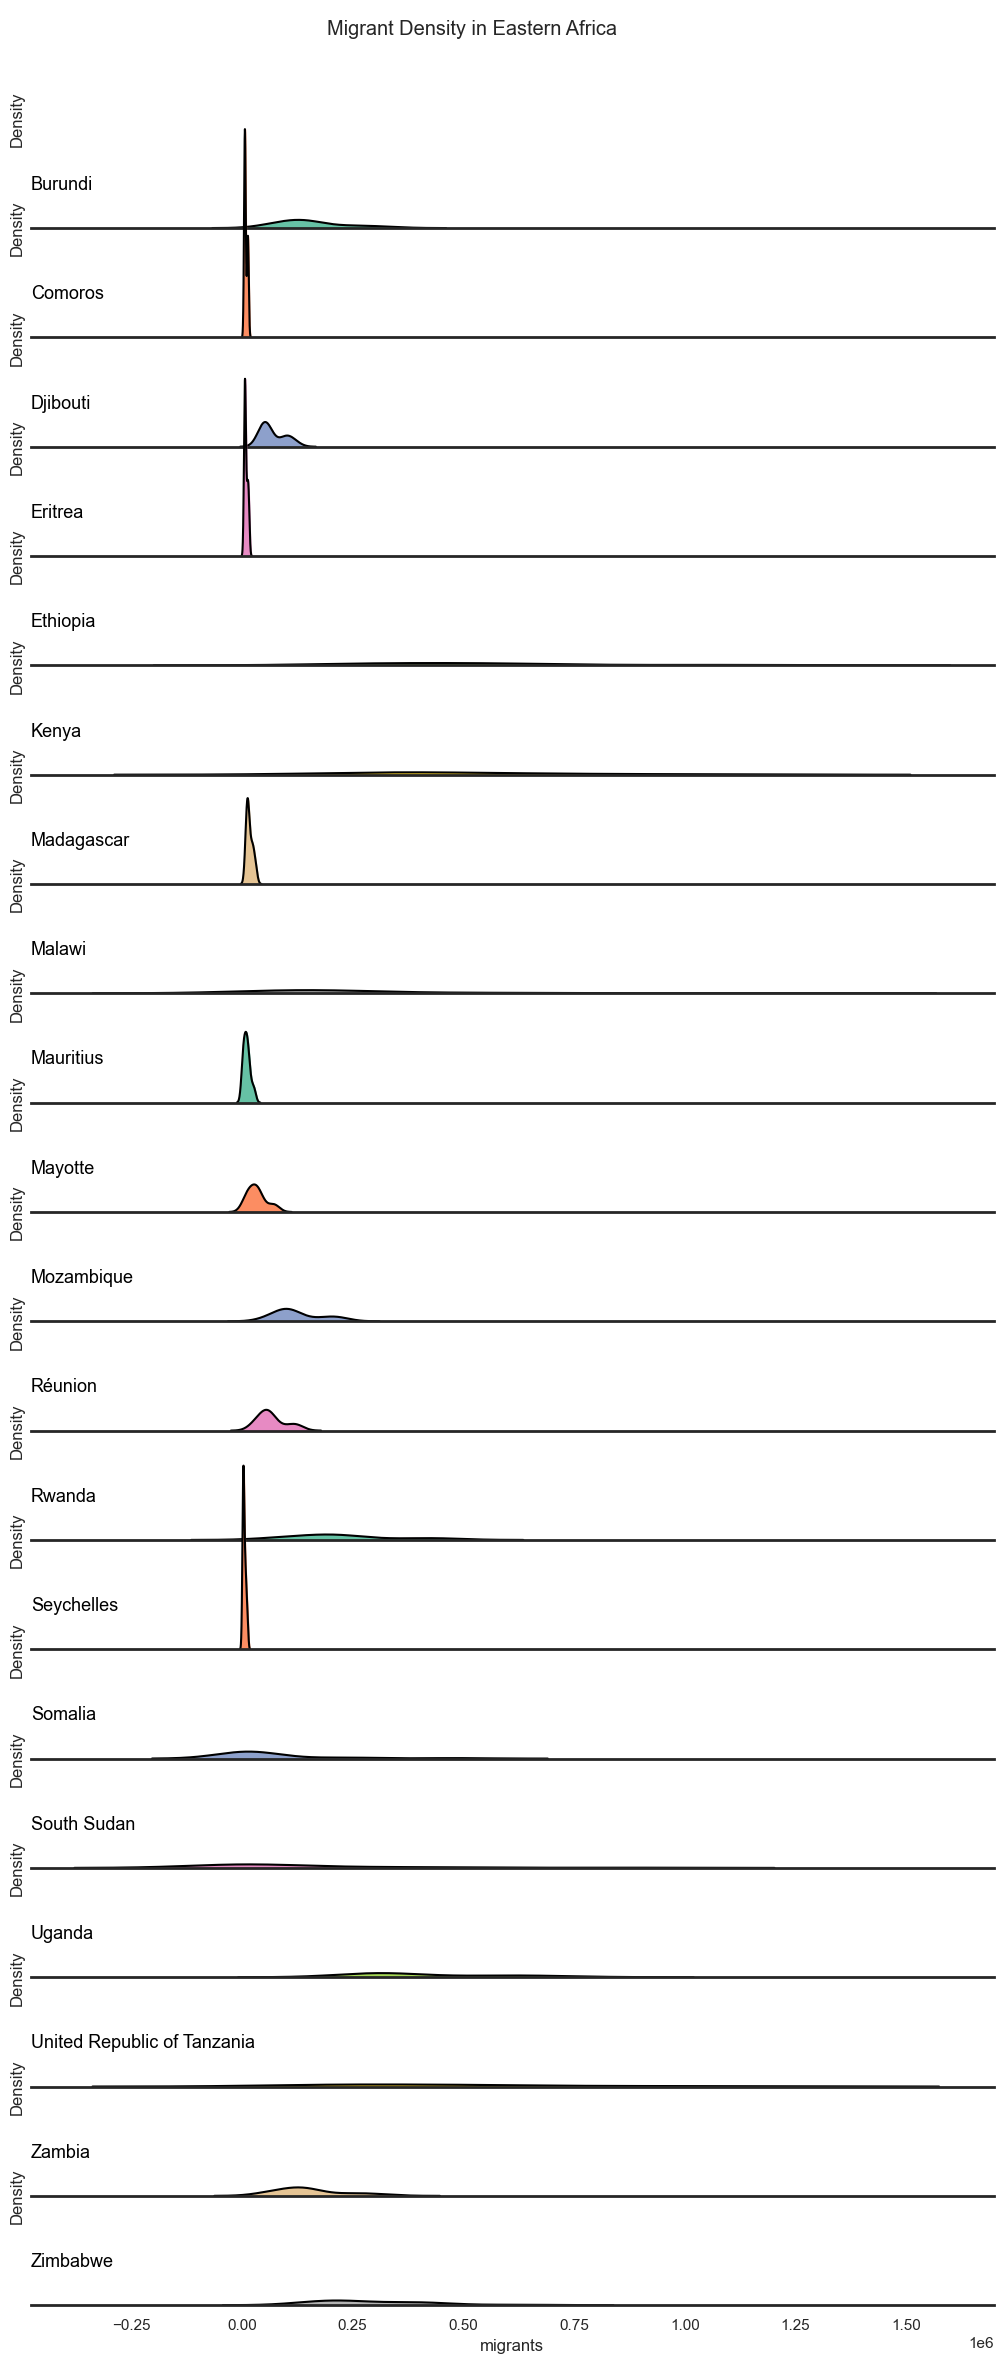

In [63]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="country", hue="country", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="migrants", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="migrants", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "country")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="migrants")
g.despine( left=True)
plt.suptitle('Migrant Density in Eastern Africa', y=0.98)

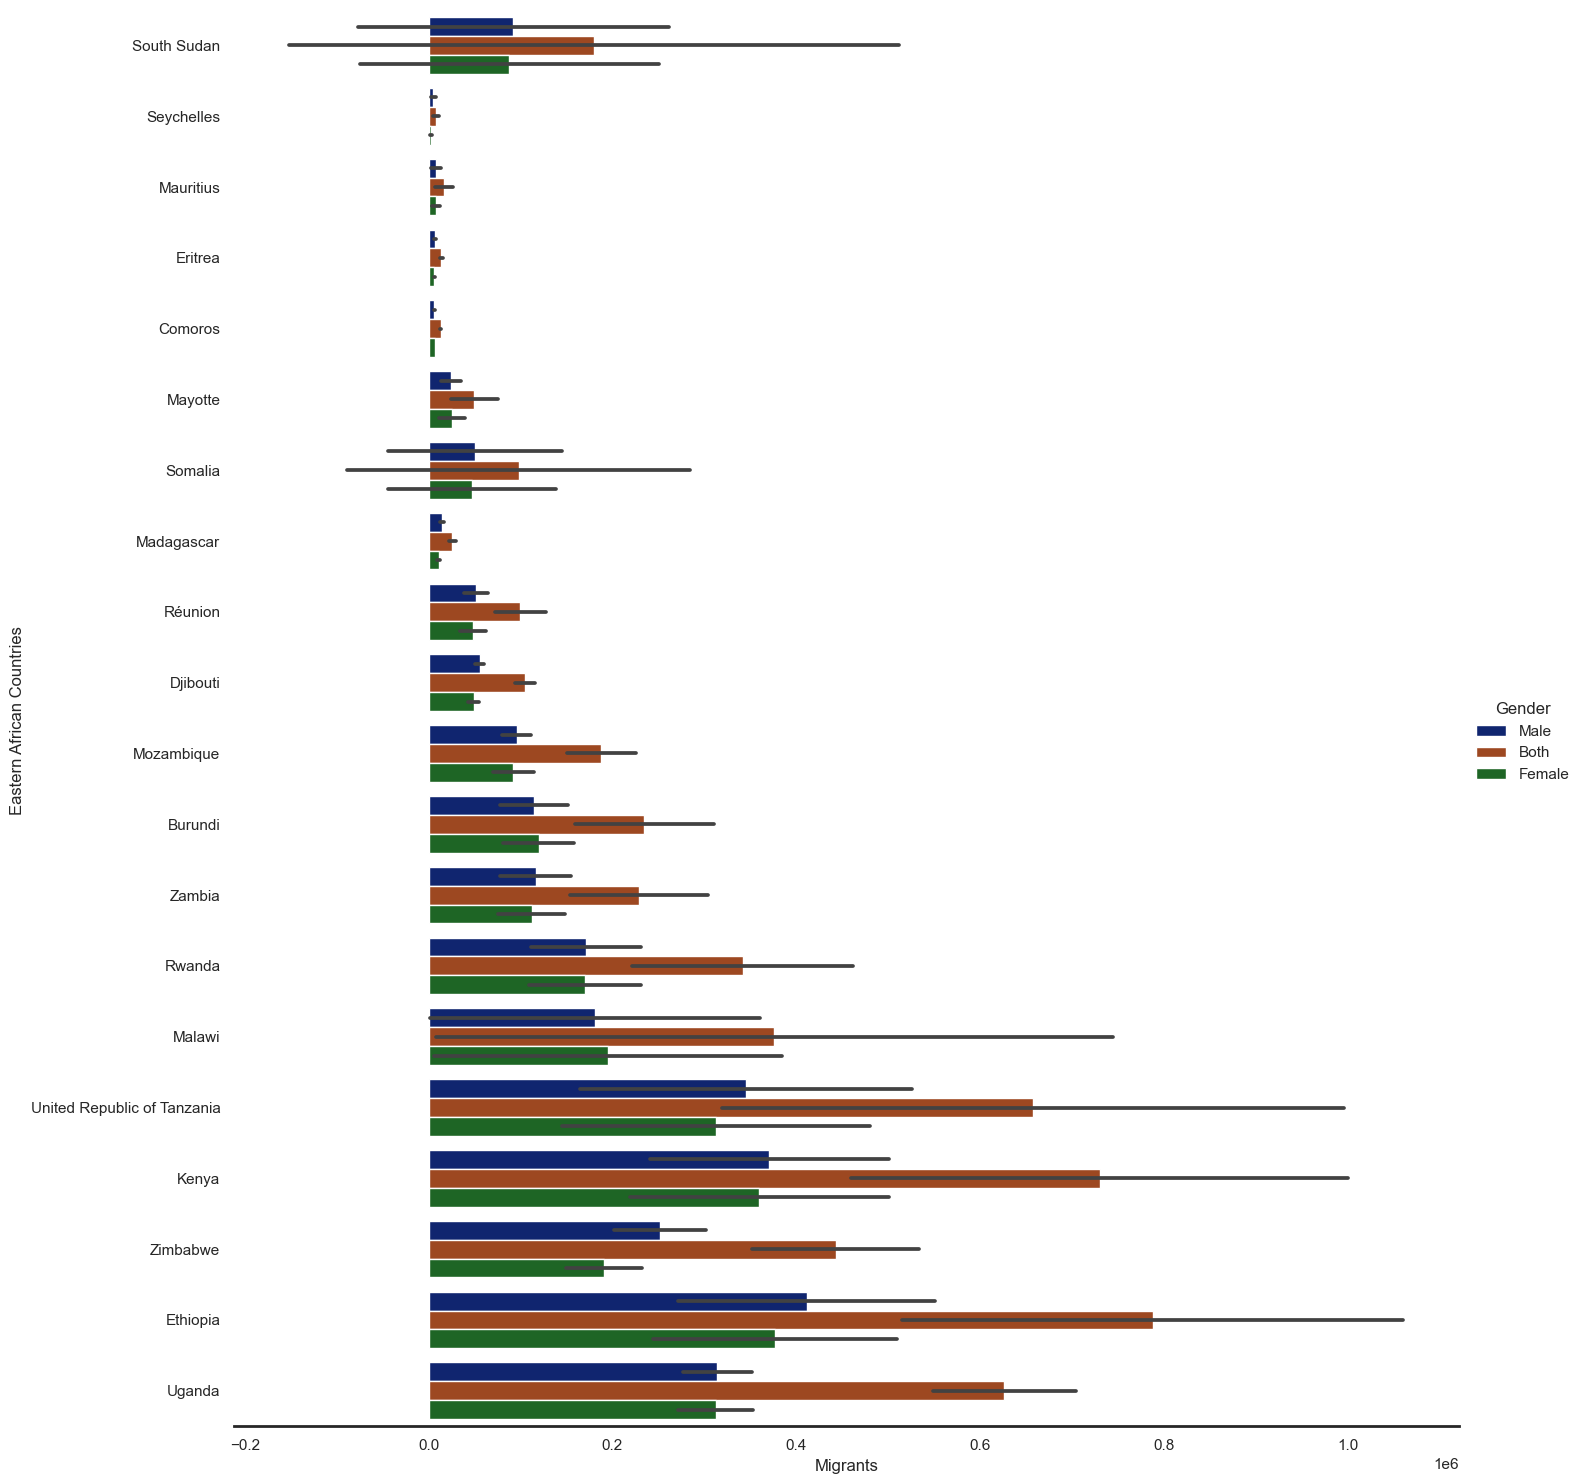

In [67]:
set_order5 = df_filtered.sort_values(by=['migrants'])

g = sns.catplot(
    data=set_order5, kind="bar",
    x="migrants", y="country", hue="gender",
    errorbar="sd", palette="dark", alpha=1, height=15
)
g.despine(left=True)
g.set_axis_labels("Migrants", "Eastern African Countries ")
g.legend.set_title("Gender")


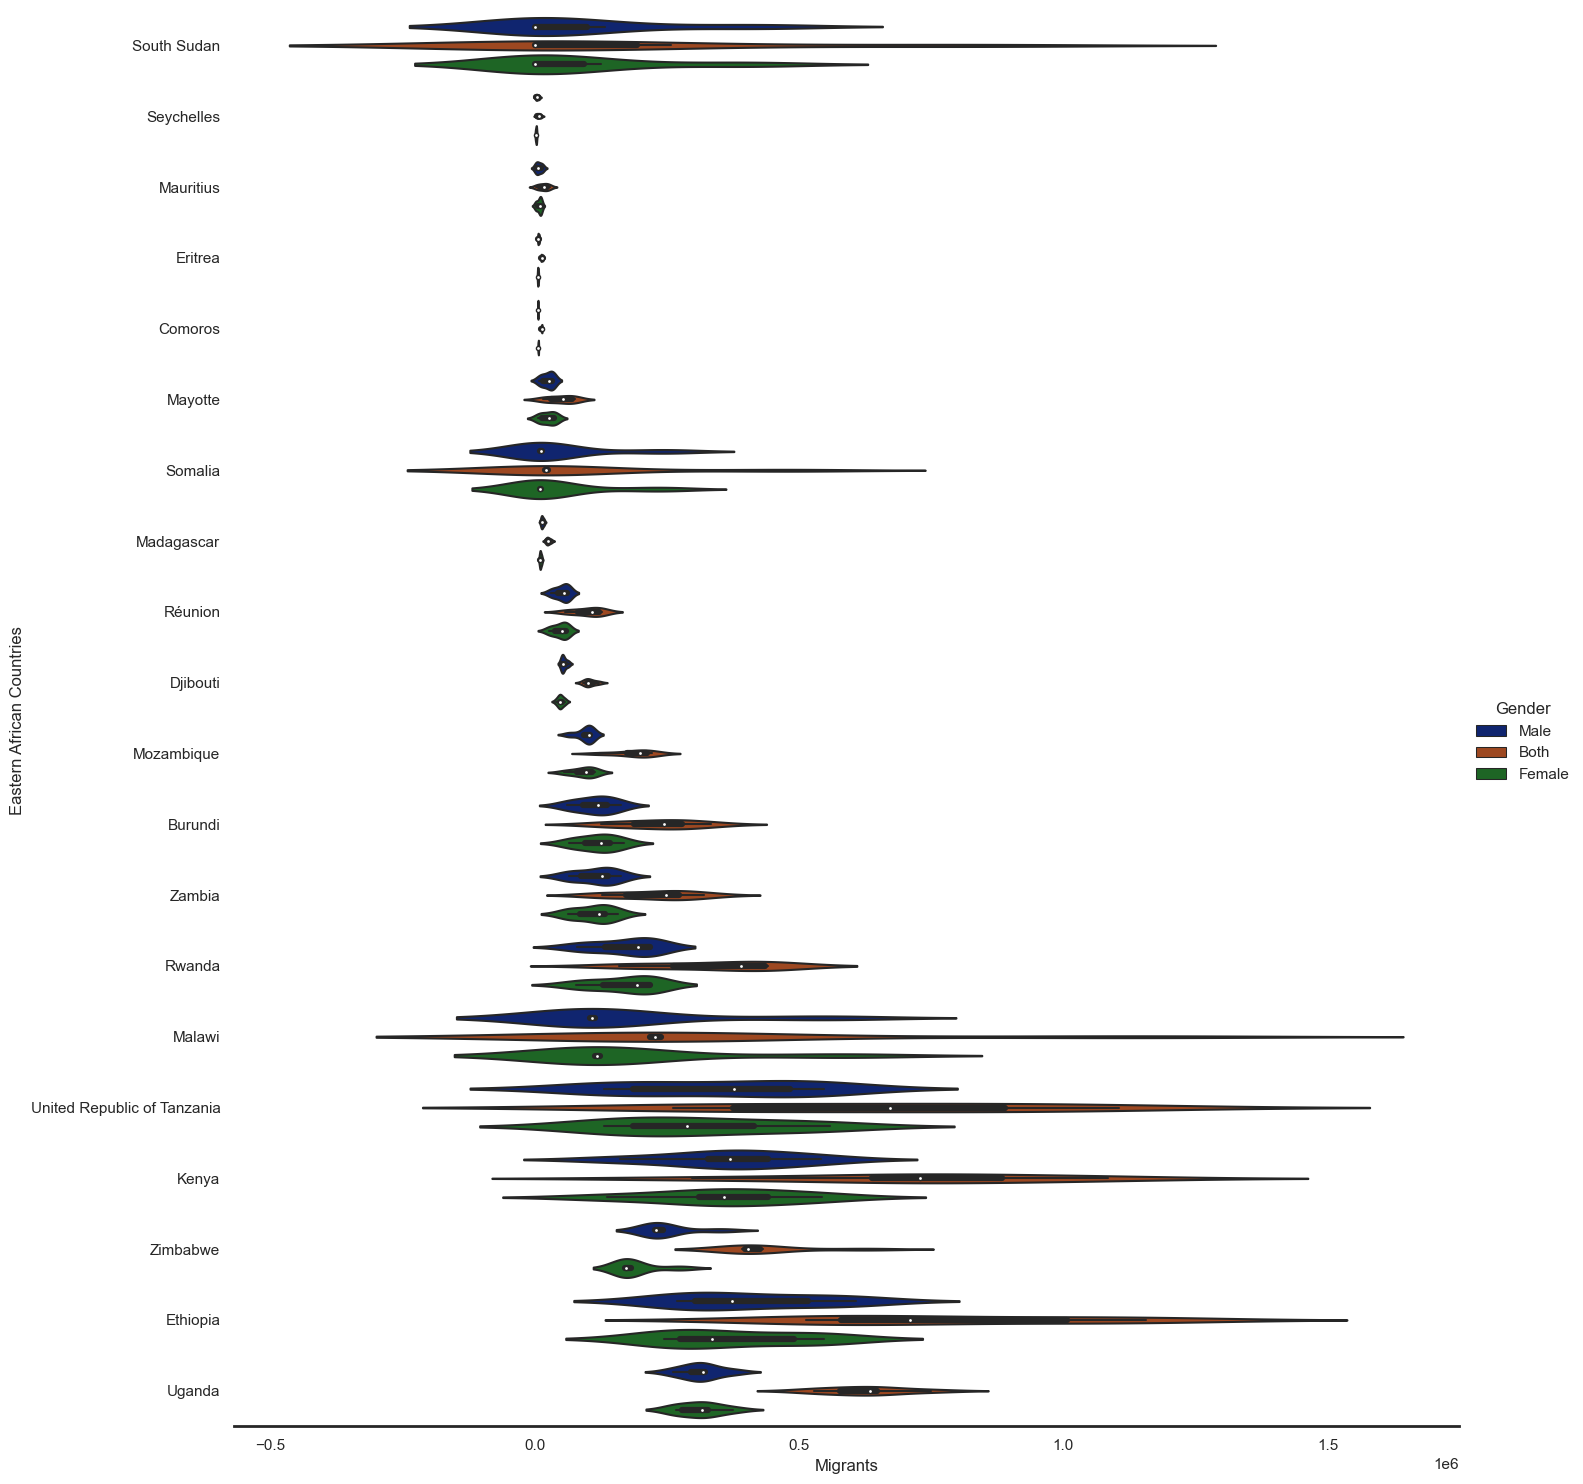

In [76]:
s = sns.catplot(
    data=set_order5,kind= "violin",
    x="migrants", y="country", hue="gender",
    errorbar="sd", palette="dark", alpha=1, height=15
)
s.despine(left=True)
s.set_axis_labels("Migrants", "Eastern African Countries ")
s.legend.set_title("Gender")


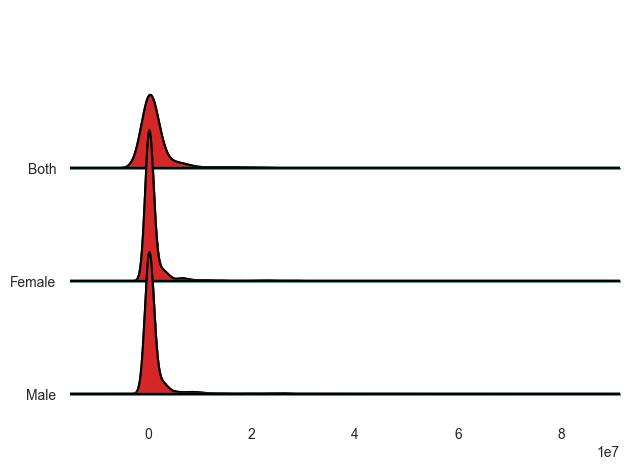

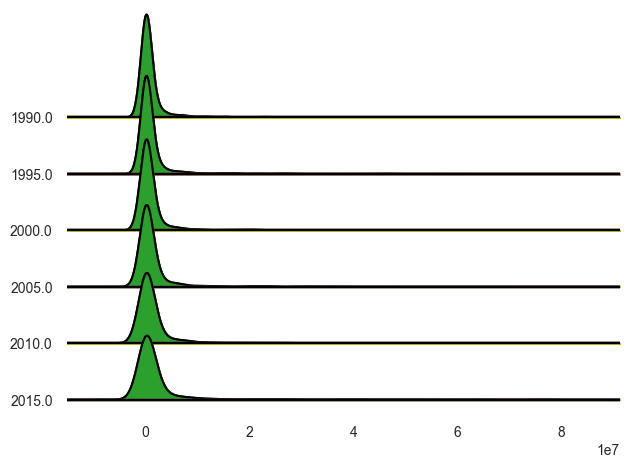

In [33]:
import joypy
df_tBig= pd.read_pickle("/Users/audreymedaino-tardif/Intro-Pyth/inf1340-programmingfordatascience-fa22/mid-term-project-submissions/AudreyMedainoTardif-Submission/Table1.plk")
df_tBig.rename(columns = {
"Name": "country",
"Notes" : "notes", 
"Country Code": "countrycode",
"# of Migrants": "migrants",
"Population(in thousands)" : "population",
"# of Migrants as Pourcentage of Population" : "percentage", 
     }, inplace=True)


df_tBig['migrants']=(df_tBig['migrants'].replace(to_replace =[".."],value =["0"]))
df_tBig['population']=(df_tBig['population'].replace(to_replace =[".."],value =["0"]))
df_tBig['percentage']=(df_tBig['percentage'].replace(to_replace =[".."],value =["0"]))

df_tBig['migrants']=df_tBig['migrants'].astype(float)
df_tBig['population']=df_tBig['migrants'].astype(float)
df_tBig['percentage']=df_tBig['percentage'].astype(float)
df_tBig['years']=df_tBig['years'].astype(float)
df_tBig['refugeeincluded']=(df_tBig['refugeeincluded'].replace(to_replace =["FALSE", "TRUE"],value =[0,1]))

fig, axes = joypy.joyplot(df_tBig, by="gender")
fig, axes = joypy.joyplot(df_tBig, by="years")

## Finally => Success in seeing complete data set with all countries

In [34]:
import altair as alt

stripplot =  alt.Chart(df_tBig, width=40).mark_circle(size=8).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('migrants'),
    color=alt.Color('country', legend=None),
    column=alt.Column(
        'country',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


alt.Chart(...)

In [ ]:
stripplot =  alt.Chart(df_s, width=40).mark_circle(size=8).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('migrants'),
    color=alt.Color('years', legend=None),
    column=alt.Column(
        'years',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


alt.Chart(...)

In [ ]:


alt.Chart(df_tBig).mark_circle().encode(
    x='country',
    y= "migrants",
    size='population',
)

alt.Chart(...)

## Which continent has the most migrants? 

In [ ]:
continents = [ "Africa", "Asia", "Europe", "Latin America and the Caribbean", "Central America", "Northern America", "Oceania"]
df_cont = df_t1[df_t6['country'].isin(continents)]

/var/folders/z4/0nlj2zjn7j74qhsd1f8g_5pm0000gn/T/ipykernel_85929/315223532.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[Text(0.5, 0, '# of Migrants'),
 Text(0, 0.5, 'Continents'),
 Text(0.5, 1.0, '# of Migrants per Continent')]

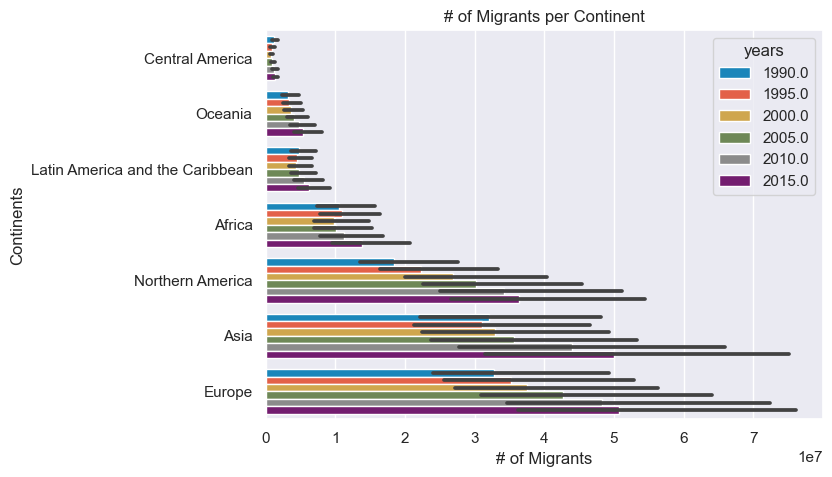

In [ ]:
sns.set_context("notebook")
sns.set_style('darkgrid')
set_order = df_cont.sort_values(by=['migrants'])
mcm = sns.barplot(data=set_order, x="migrants", y="country", hue="years",
      )
 
# add label to the axis and label to the plot
mcm.set(xlabel ="# of Migrants", ylabel = "Continents", title ='# of Migrants per Continent')

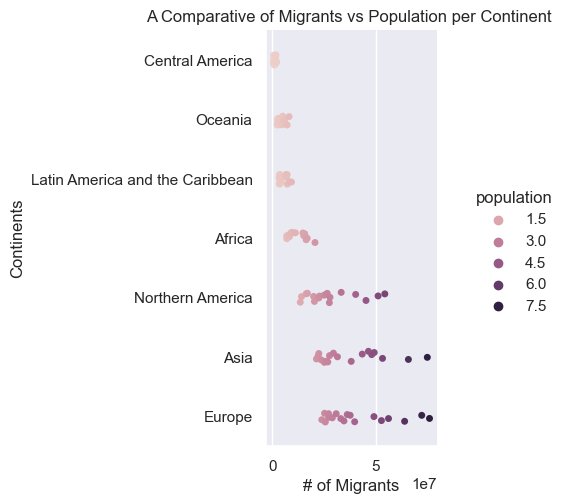

In [ ]:
sns.set_context("notebook")
sns.set_style('darkgrid')
set_order = df_cont.sort_values(by=['migrants'])
mpm = sns.catplot(data=set_order, x="migrants", y="country", hue="population")
mpm.set(xlabel ="# of Migrants", ylabel = "Continents", title ='A Comparative of Migrants vs Population per Continent ')